# <font color='blue'>GRAPHS</font>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## EJEMPLO

In [2]:
# 500 valores separados linealmente

x_data = np.linspace(0.0,10.0,500)

In [3]:
# 500 valores random

noise = np.random.randn(len(x_data))
noise.shape

(500,)

In [5]:
# Aca vamos a mezclar los puntos lineales con los ruidosos 
# y = mx + b + noise_levels
# m = 0.5  ,  b = 5 y ruido para encontrar "m" y "b" con TensorFlow

y_true =  (0.5 * x_data ) + 5 + noise
y_true.shape


(500,)

In [6]:
# Paso a Dataframe los datos hechos con numpy

x_df = pd.DataFrame(x_data,columns=['X Data'])
y_df = pd.DataFrame(y_true,columns=['Y True'])
x_df.head()

,X Data
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [7]:
all_data = pd.concat([x_df,y_df],axis=1)
all_data.head()

,X Data,Y True
0,0.00000,6.492127
1,0.02004,3.948371
2,0.04008,6.927520
3,0.06012,4.983693
4,0.08016,5.653284


## pandas dataframe_name.sample.plot

- **``dataframe_name.sample(n=100)``**: Utiliza 100 pares de valores XY para lo que sigue, que en este caso es graficar


- **``dataframe_name.sample(n=100).plot(kind='scatter',x='X Data',y='Y True').``**: Ploteo con los 100 puntos random (tenia 10.000 puntos, y eso iba a hacer que tarde mucho para graficar, por eso usamos solo 100 pares XY.

<AxesSubplot:xlabel='X Data', ylabel='Y True'>

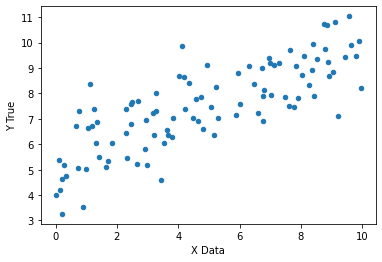

In [7]:
all_data.sample(n=100).plot(kind='scatter',x='X Data',y='Y True')

## TensorFlow con Keras

m = 0.498
b = 4.9


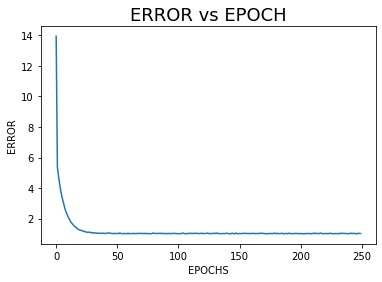

In [34]:
# Modelo de Keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(0.01))
#model.summary()         # Comentado para que no salga en la salida y salgan solo "m" y "b"

# Entreno el modelo
history = model.fit(x_data, y_true, epochs=250,verbose=0,batch_size=None)

# Hago la prediccion de Y utilizando el modelo entrenado y veo los valores de "m" y "b" calculados
y = model.predict(x_data,verbose=0,batch_size=2)
tf.print('m =',round(float(model.variables[0]),3))
tf.print('b =',round(float(model.variables[1]),3))


plt.plot(history.history['loss'])
plt.title('ERROR vs EPOCH',size=18)
plt.xlabel('EPOCHS')
plt.ylabel('ERROR')
plt.show()

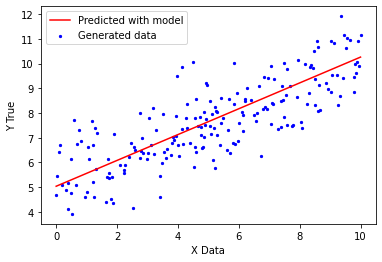

In [10]:
# Grafico utilizando el DATAFRAME_NAME.sample, que elige pares aleaorios

all_data.sample(n=200).plot(kind='scatter',x='X Data',y='Y True',label='Generated data',marker='.',color='b')
plt.plot(x_data, y, label='Predicted with model', color='r')
plt.legend()
plt.show()